In [ ]:
# My work is to analyse the final csv on validation and its truths

import pandas as pd
import numpy as np

# Read the csv file
pred = pd.read_csv('results/submission_with_probabilities.csv')
meta_data = pd.read_csv('training_set_metadata.csv')

# for each object id in pred get the predicted_class from pred and target from tr
# we need to print conf_mtx

targets = np.hstack([np.unique(meta_data['target'])])
target_map = {j:i for i, j in enumerate(targets)}
target_ids = [target_map[i] for i in meta_data['target']]
meta_data['target_id'] = target_ids

conf_mtx = np.zeros((len(targets), len(targets)))
truth = []
predicted = []
for i, row in pred.iterrows():
    pred_class = int(row['predicted_class'])
    target = meta_data[meta_data['object_id'] == row['object_id']]['target_id'].values[0]
    conf_mtx[target, pred_class] += 1
    truth.append(target)
    predicted.append(pred_class)



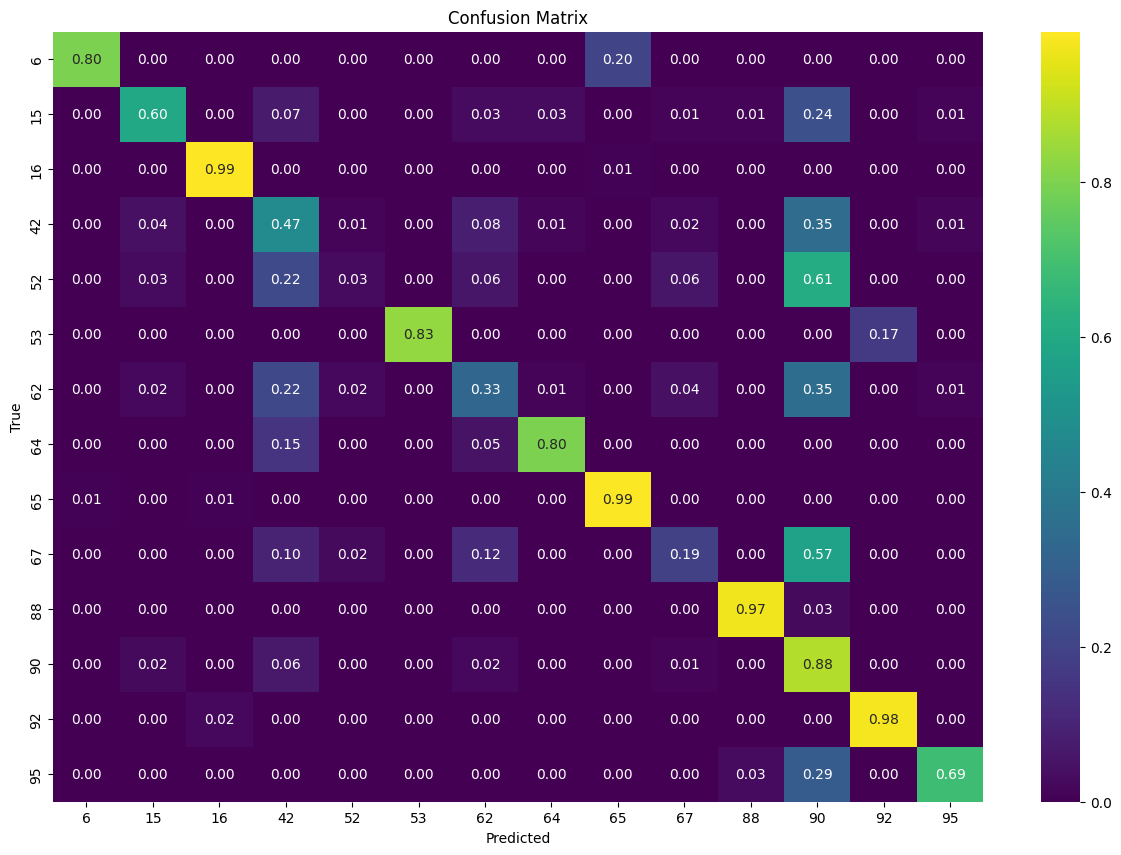

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mtx = conf_mtx / conf_mtx.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15, 10))
sns.heatmap(conf_mtx, cmap='viridis', annot=True, fmt=".2f", xticklabels=targets, yticklabels=targets)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('results/confusion_matrix.png')

Accuracy:  0.7560509554140128
Precision:  0.7375895159812931
Recall:  0.7560509554140128
F1:  0.7385826320251174


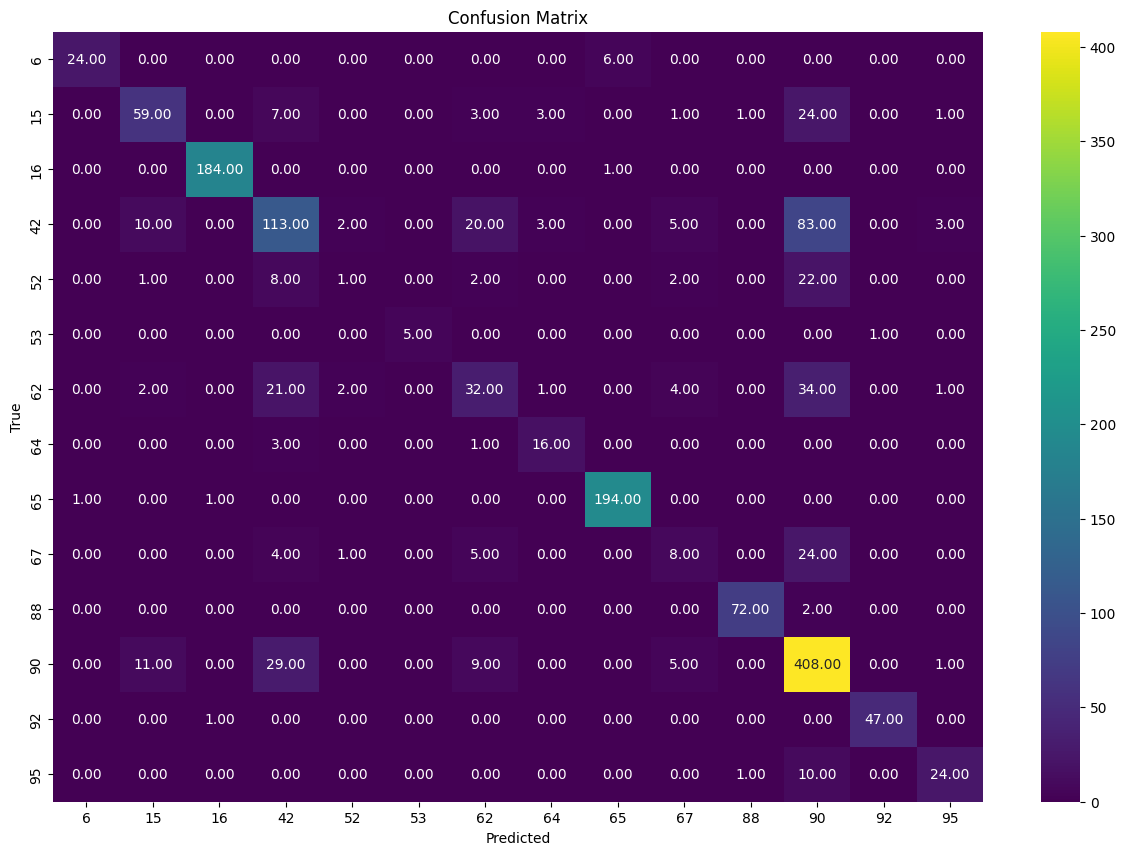

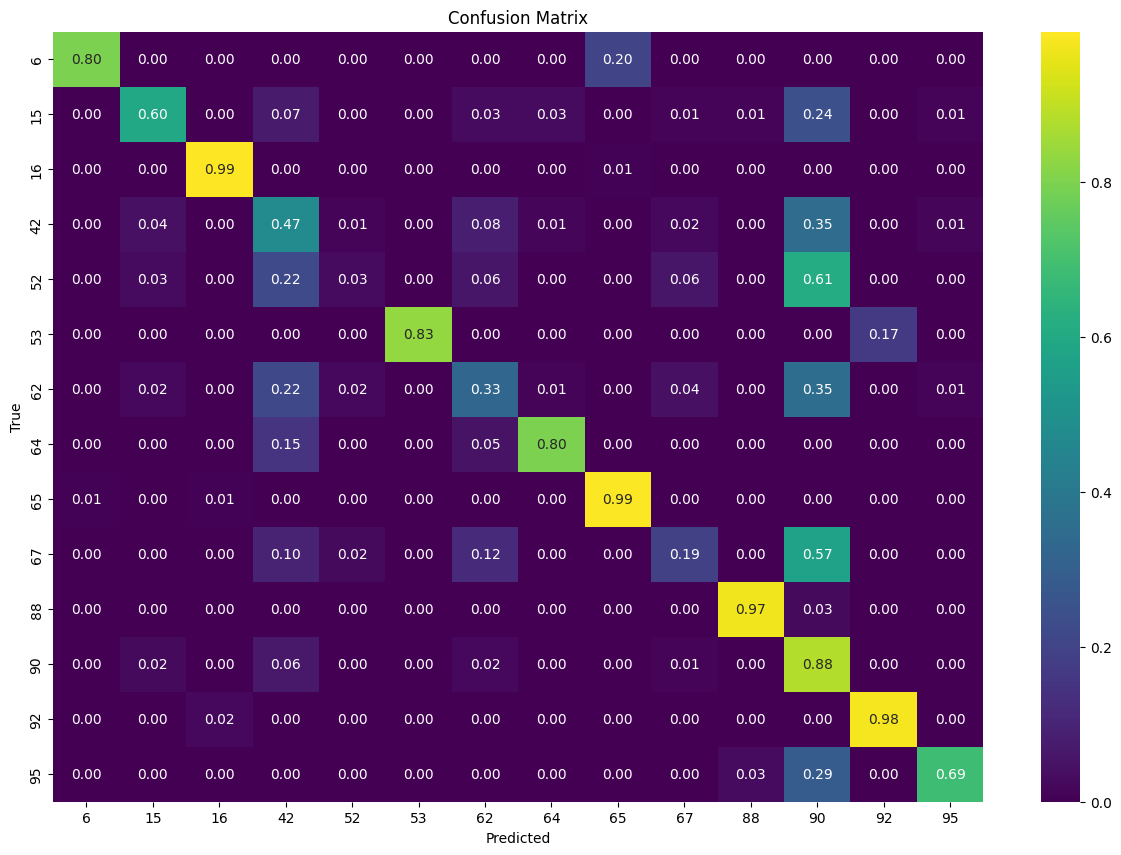

In [28]:
# print accuracy, precision, recall, f1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_true = np.array(truth)
y_pred = np.array(predicted)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)
# confusion matrix in nice format

conf_mtx = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 10))
sns.heatmap(conf_mtx, cmap='viridis', annot=True, fmt=".2f", xticklabels=targets, yticklabels=targets)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('results/confusion_matrix_counts.png')
conf_mtx = conf_mtx / conf_mtx.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15, 10))
sns.heatmap(conf_mtx, cmap='viridis', annot=True, fmt=".2f", xticklabels=targets, yticklabels=targets)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('results/confusion_matrix.png')



